In [2]:
#from pyreaddbc import readdbc

#for i in range(2010, 2013):
    #readdbc.dbc2dbf(f'data/DOPB{i}.DBC', f'data/DOPB{i}.DBF')

In [3]:
import pandas as pd
from dbfread import DBF

df_list = []

for i in range(10, 23):
    file = DBF(f'data/DOPB20{i}.dbf', load=True)
    print(file)
    df = pd.DataFrame(file)
    df_list.append(df)

<loaded DBF table 'data/DOPB2010.dbf'>
<loaded DBF table 'data/DOPB2011.dbf'>
<loaded DBF table 'data/DOPB2012.dbf'>
<loaded DBF table 'data/DOPB2013.dbf'>
<loaded DBF table 'data/DOPB2014.dbf'>
<loaded DBF table 'data/DOPB2015.dbf'>
<loaded DBF table 'data/DOPB2016.dbf'>
<loaded DBF table 'data/DOPB2017.dbf'>
<loaded DBF table 'data/DOPB2018.dbf'>
<loaded DBF table 'data/DOPB2019.dbf'>
<loaded DBF table 'data/DOPB2020.dbf'>
<loaded DBF table 'data/DOPB2021.dbf'>
<loaded DBF table 'data/DOPB2022.dbf'>


In [4]:
df_concat = pd.DataFrame()

for df in df_list:
    df_concat = pd.concat([df_concat, df])

len(df_list)

13

In [5]:
from numpy import nan

columns = ['DTOBITO','CONTADOR','HORAOBITO','NATURAL','CODMUNNATU','DTNASC','IDADE','SEXO','RACACOR','ESTCIV','ESC2010','CODMUNRES','LOCOCOR','CODMUNOCOR','CIRCOBITO','FONTE', 'TIPOBITO']

df_hom = (df_concat
 .filter(columns)
 .drop_duplicates()
 .replace('', nan)
 .query('CIRCOBITO == "3"')
 .query('TIPOBITO == "2"')
 .astype({'ESC2010': float})
)

In [6]:
qtd_linhas = df_concat.shape[0]

(df_hom
 .query('ESC2010 == 9').shape[0] # possivel limitação devido ao 9 == ignorado
)

4353

In [7]:
(df_hom
 .groupby('ESC2010', dropna=False)['CONTADOR'].count()
 #.apply(lambda x: (x/qtd_linhas) * 100).sum()
)

ESC2010
0.0     335
1.0    2009
2.0    1319
3.0     505
4.0      43
5.0      85
9.0    4353
NaN    8189
Name: CONTADOR, dtype: int64

<Axes: xlabel='LOCOCOR'>

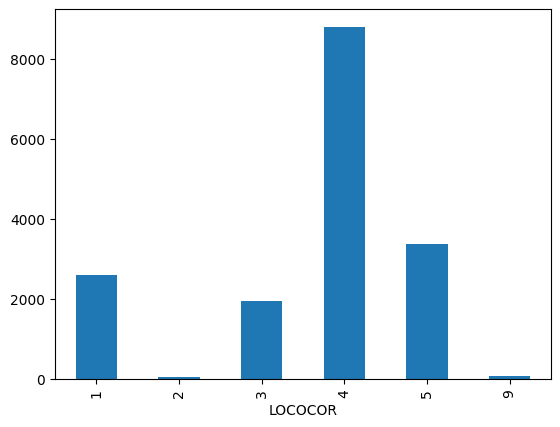

In [8]:
df_hom.groupby('LOCOCOR')['CONTADOR'].count().plot(kind='bar') # 4 - via pública é o maior

In [9]:
df_hom.groupby('FONTE', dropna=False)['CONTADOR'].count()#.plot(kind='bar')#.sum()

FONTE
1      11530
2         61
3         18
4        118
9        151
NaN     4960
Name: CONTADOR, dtype: int64

In [10]:
(df_hom
 .reset_index()
 .drop('index', axis=1)
 .query("IDADE.str.startswith('4') == False")
 .groupby('IDADE')['CONTADOR'].count().sum()
) # 54 não tem idade definida (indigente ou cpf perdido...)

np.int64(54)

In [11]:
df_hom = df_hom.reset_index().drop('index', axis=1)
df_hom.query("NATURAL.str.startswith('8') and NATURAL != '999' and NATURAL.str.endswith('25') == False").groupby('NATURAL')['CONTADOR'].count()

NATURAL
8        1
800    292
812      1
813      3
815      2
821      7
822      2
823     42
824    169
826    434
827     18
828      4
829     26
831      4
833    108
835    119
841      4
842      2
85       3
851      3
852      1
853     10
Name: CONTADOR, dtype: int64

<Axes: xlabel='ESC2010'>

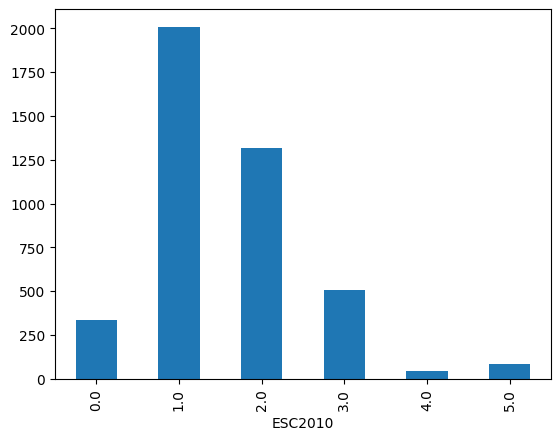

In [12]:
df_hom.groupby('ESC2010')['CONTADOR'].count().drop(9).plot(kind='bar')

In [13]:
df_hom['DTOBITO'] = df_hom['DTOBITO'].apply(lambda x: x[-4:])
df_hom.groupby('DTOBITO')['CONTADOR'].count()

DTOBITO
2010    1364
2011    1555
2012    1460
2013    1511
2014    1521
2015    1487
2016    1301
2017    1314
2018    1201
2019     861
2020    1092
2021    1099
2022    1072
Name: CONTADOR, dtype: int64

In [16]:
pd.read_csv('https://ftp.ibge.gov.br/Contagem_da_Populacao/Contagem_da_Populacao_2007/Agregado_por_Setores_Censitarios_2007/Agregado_por_Setores_Censitarios_2007_PB.zip', compression='zip')

ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['PESSOAP3_25.xls', 'DOMICILIO25.xls', 'PESSOAP1_25.xls', 'PESSOAP2_25.xls', 'BASICO25.xls', 'PESSOAP4_25.xls', 'RESPONSAVEL25.xls', 'Descriç╞o de setores - PB.xls', 'Documentacao_agregado.doc']